# CEE 690, Lecture 9 Code Examples

This course will make use of notebook style coding.  Notebooks are incredibly useful tools both for teaching and for disseminating data anlysis.

This is a partial set of codes to explain Trees and Forests.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "09"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

Note that I haven't done model selection here!  That will be left as a homework exercise.

## Trees

This visualization requires the install of the "graphviz" python package.  _This isn't required for any assignment in the class_, but is frequently used in visualizations and can be fun to play around with.

For those of inclined, this should be easy to install on a personal machine. If you use a mac/linux/windows, then the command in a terminal is just:
conda install python-graphviz  
To help with saving pdfs:  
conda install pydot

Alternatively, this can be install via Anaconda Navigator (which was installed if you used the anaconda python installer).
Go to environments (you likely only have "root"), click on your environment, and you can then search for graphviz in the "available packages."


In [42]:
import graphviz, pylab
from sklearn.tree import export_graphviz
from sklearn import datasets
cancer=datasets.load_breast_cancer()
X=cancer.data
y=cancer.target

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = \
    train_test_split(X,y,random_state=42)


In [44]:
# will not go through this code, will be used to visualize trees.
# to use, requires a 'tmp' directory.
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir('tmp')):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir('tmp')
# visualization function
def visualize_tree(tree,feature_names=cancer.feature_names,class_names=cancer.target_names):
    export_graphviz(tree, out_file="tmp/tree.dot", class_names=class_names,
                    feature_names=feature_names, impurity=False, filled=True)
    with open("tmp/tree.dot") as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [45]:
# This function is useful to save pdfs of the tree for inclusion in reports.
import pydot
def save_tree(output_file_name='tree.pdf',loc='tmp/',in_file='tmp/tree.dot'):
    (graph,) = pydot.graph_from_dot_file(in_file)
    graph.write_pdf(loc+output_file_name)

In [46]:
from sklearn.tree import DecisionTreeClassifier

First, a decision tree with a single decision node

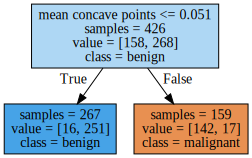

In [48]:
tree1 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=1,max_features=None)
tree1=tree1.fit(X_train,y_train)
visualize_tree(tree1)

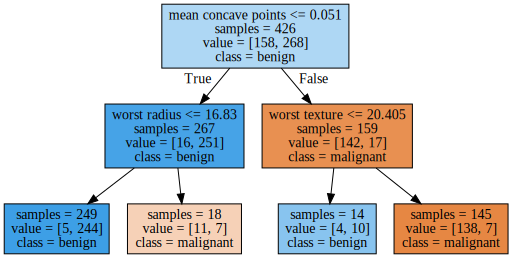

In [49]:
tree2 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=2,max_features=None)
tree2=tree2.fit(X_train,y_train)
visualize_tree(tree2)
save_tree('split_2.pdf')

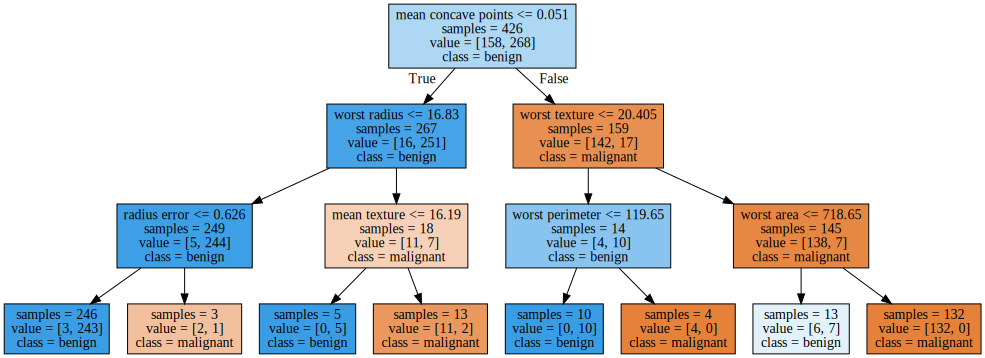

In [14]:
tree3 = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=3,max_features=None)
tree3=tree3.fit(X_train,y_train)
visualize_tree(tree3)
save_tree('split_3.pdf')

In [15]:
from sklearn.metrics import roc_auc_score
yhat=tree1.predict_proba(X_valid)
print('The first tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree2.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree3.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))

The first tree has an AUC of 0.9011652101539741
The second tree has an AUC of 0.9452767374115689
The second tree has an AUC of 0.969725343320849


## What happens when we learn a "random" tree like in a random forest?

In [16]:
def random_feature_selector(total_features,number_to_select):
    random_features=np.random.permutation(total_features)[:number_to_select]
    return np.sort(random_features)

In [17]:
# set seed for reproducibility:
np.random.seed(42)
total_features=X.shape[1]
number_to_select=np.int(np.round(np.sqrt(total_features)))
random_features=random_feature_selector(total_features,number_to_select)
print(random_features)

[ 8 15 17 23 27]


Try a 1-layer tree using only these features:

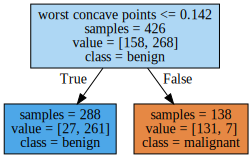

In [18]:
tree = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=1,max_features=None)
tree=tree.fit(X_train[:,random_features],y_train)
visualize_tree(tree,feature_names=cancer.feature_names[random_features])

Using a different seed:

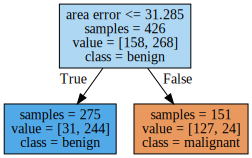

In [19]:
# set seed for reproducibility:
np.random.seed(100)
random_features=random_feature_selector(total_features,number_to_select)
tree = DecisionTreeClassifier(\
    random_state=0,criterion='gini', splitter='best',max_depth=1,max_features=None)
tree=tree.fit(X_train[:,random_features],y_train)
visualize_tree(tree,feature_names=cancer.feature_names[random_features])

Also can be built into the decision tree to split on a random subset of features:

Note that unlike the above, will use a different random split on _every_ branch, as would happen in a random forest.

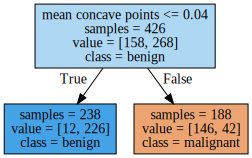

In [20]:
tree = DecisionTreeClassifier(\
    random_state=42,criterion='gini', splitter='random',
                              max_features=5,max_depth=1)
tree=tree.fit(X_train,y_train)
visualize_tree(tree)

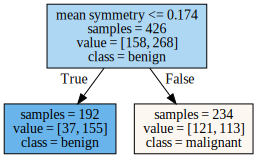

In [21]:
tree = DecisionTreeClassifier(\
    random_state=100,criterion='gini', splitter='random',
                              max_features=5,max_depth=1)
tree=tree.fit(X_train,y_train)
visualize_tree(tree)

We can do the same thing with resampling data points, but won't show for simplicity.

## Random Forest
The random forest is a great "out-of-the-box" technique that works by building many simple trees and averaging over them.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
our_forest=RandomForestClassifier(n_estimators=10,max_depth=1,min_samples_split=2,min_samples_leaf=1,\
                     random_state=42,max_features='auto')
our_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Let's visualize some of our trees:

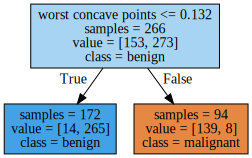

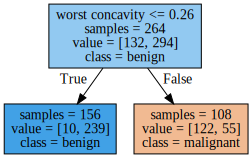

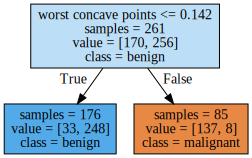

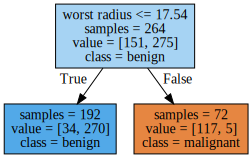

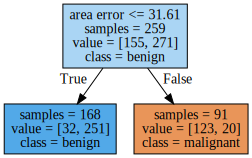

In [24]:
# Extract single tree
for t in range(0,5):
    a_single_tree = our_forest.estimators_[t]
    visualize_tree(a_single_tree)

Also works as we get more and more complex trees:

In [25]:
our_forest=RandomForestClassifier(n_estimators=10,max_depth=3,min_samples_split=5,min_samples_leaf=2,\
                     random_state=42,max_features='auto')
our_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

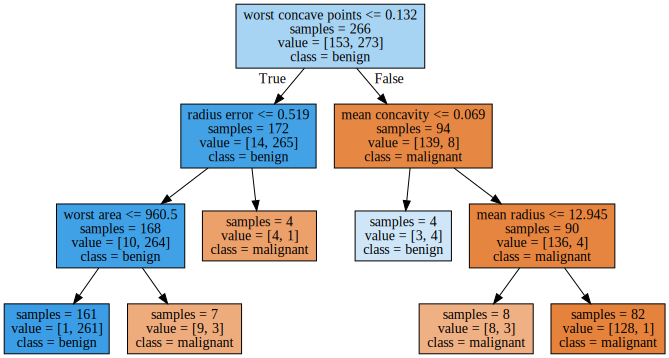

In [26]:
# Extract single tree
for t in range(0,1):
    a_single_tree = our_forest.estimators_[t]
    visualize_tree(a_single_tree)

Evaluate performance on this dataset

In [27]:
from sklearn.metrics import roc_auc_score
yhat=tree1.predict_proba(X_valid)
print('The first tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree2.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=tree3.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))
yhat=our_forest.predict_proba(X_valid)
print('The second tree has an AUC of {0}'.format(roc_auc_score(y_valid,yhat[:,1])))

The first tree has an AUC of 0.9011652101539741
The second tree has an AUC of 0.9452767374115689
The second tree has an AUC of 0.969725343320849
The second tree has an AUC of 0.99625468164794


Works pretty well "out of the box!"

#### On a more complicated dataset:

In [28]:
from sklearn.datasets import fetch_covtype
# we're predict the dominant species in a forest
forest_data=fetch_covtype()

In [29]:
print(forest_data.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be d

In [30]:
from sklearn import feature_selection
# To not worry about computational time, we're only going to use 4,000 samples
np.random.seed(42)
rand_perm=np.random.permutation(581012)
# screen low variance features
screen=feature_selection.VarianceThreshold(.01)
X=screen.fit_transform(forest_data.data[rand_perm[:4000]])
y=forest_data.target[rand_perm[:4000]]

In [31]:
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

In [32]:
our_forest=RandomForestClassifier(n_estimators=20,max_depth=10,min_samples_split=2,min_samples_leaf=1,\
                     random_state=42,max_features='auto')
our_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid,our_forest.predict(X_valid)))

0.711


This is pretty good "out-of-the-box," but not quite as good as our forward feature selection with kNN.  Regardless, this is a very standard strategy that gits very good results.

For our one final thing, we will visualize what a tree looks like:

In [34]:
forest_data

{'data': array([[2.596e+03, 5.100e+01, 3.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.590e+03, 5.600e+01, 2.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.804e+03, 1.390e+02, 9.000e+00, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        ...,
        [2.386e+03, 1.590e+02, 1.700e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.384e+03, 1.700e+02, 1.500e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00],
        [2.383e+03, 1.650e+02, 1.300e+01, ..., 0.000e+00, 0.000e+00,
         0.000e+00]]),
 'target': array([5, 5, 2, ..., 3, 3, 3], dtype=int32),
 'DESCR': ".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`da

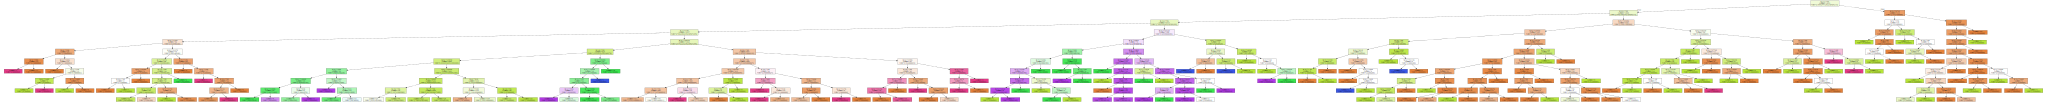

In [35]:
# Extract single tree
for t in range(0,1):
    a_single_tree = our_forest.estimators_[t]
    visualize_tree(a_single_tree,feature_names=None,class_names=None)